In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import zero_one_loss

import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df=pd.read_csv("E:\\DIP\\Competition\\assessment-of-potential-threat\\traindata.csv")
test_df=pd.read_csv("E:\\DIP\\Competition\\assessment-of-potential-threat\\testdata.csv")

In [3]:
train_df.copy()

,Unnamed: 0,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F78,F79,F80,F81,F82,F83,F84,F85,F86,Label
0,0,687,172.16.0.5-192.168.50.1-26580-22-6,172.16.0.5,26580,192.168.50.1,22,6,2018-12-01 09:22:09.400341,11435366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
1,1,638,192.168.50.7-52.114.77.33-50657-443-6,192.168.50.7,50657,52.114.77.33,443,6,2018-12-01 09:22:09.722697,102387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
2,2,9352,192.168.50.7-52.114.77.33-50657-443-6,52.114.77.33,443,192.168.50.7,50657,6,2018-12-01 09:22:09.825086,116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
3,3,640,192.168.50.7-74.208.236.171-50572-80-6,74.208.236.171,80,192.168.50.7,50572,6,2018-12-01 09:22:11.029229,141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
4,4,7435,192.168.50.7-74.208.236.171-50572-80-6,192.168.50.7,50572,74.208.236.171,80,6,2018-12-01 09:22:11.029380,54918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136406,136406,178379,172.16.0.5-192.168.50.1-648-55755-17,172.16.0.5,648,192.168.50.1,55755,17,2018-12-01 12:00:16.082867,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
136407,136407,200065,172.16.0.5-192.168.50.1-592-17197-17,172.16.0.5,592,192.168.50.1,17197,17,2018-12-01 12:00:16.082955,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
136408,136408,229189,172.16.0.5-192.168.50.1-593-39092-17,172.16.0.5,593,192.168.50.1,39092,17,2018-12-01 12:00:16.082957,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
136409,136409,232005,172.16.0.5-192.168.50.1-594-61362-17,172.16.0.5,594,192.168.50.1,61362,17,2018-12-01 12:00:16.083005,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0


In [4]:
test_df.copy()

,Unnamed: 0,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F77,F78,F79,F80,F81,F82,F83,F84,F85,F86
0,0,454136,172.16.0.5-192.168.50.4-5967-5967-6,172.16.0.5,5967,192.168.50.4,5967,6,2018-11-03 11:36:30.225322,38928087,...,64.500000,89.802561,128.0,1.0,1.297599e+07,2.360014e+06,15371769.0,10653446.0,0,1
1,1,334585,172.16.0.5-192.168.50.4-48161-46578-6,172.16.0.5,48161,192.168.50.4,46578,6,2018-11-03 11:36:30.225525,105,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
2,2,246617,172.16.0.5-192.168.50.4-22804-22804-6,172.16.0.5,22804,192.168.50.4,22804,6,2018-11-03 11:36:30.225526,24368284,...,90.000000,25.119713,105.0,61.0,8.122671e+06,2.862532e+06,10832964.0,5128982.0,0,1
3,3,43667,172.16.0.5-192.168.50.4-48162-43438-6,172.16.0.5,48162,192.168.50.4,43438,6,2018-11-03 11:36:30.225576,104,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
4,4,84587,172.16.0.5-192.168.50.4-61803-61803-6,172.16.0.5,61803,192.168.50.4,61803,6,2018-11-03 11:36:30.225633,42848358,...,30.333333,25.403412,45.0,1.0,1.428272e+07,8.454236e+05,14853735.0,13311501.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101495,101495,289413,172.16.0.5-192.168.50.4-939-49424-17,172.16.0.5,939,192.168.50.4,49424,17,2018-11-03 10:01:53.446963,1,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
101496,101496,278637,172.16.0.5-192.168.50.4-940-29915-17,172.16.0.5,940,192.168.50.4,29915,17,2018-11-03 10:01:53.447215,1,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
101497,101497,274304,172.16.0.5-192.168.50.4-941-37022-17,172.16.0.5,941,192.168.50.4,37022,17,2018-11-03 10:01:53.447269,1,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
101498,101498,47597,172.16.0.5-192.168.50.4-648-53135-17,172.16.0.5,648,192.168.50.4,53135,17,2018-11-03 10:01:53.447271,48,...,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136411 entries, 0 to 136410
Data columns (total 89 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  136411 non-null  int64  
 1   F0          136411 non-null  int64  
 2   F1          136411 non-null  object 
 3   F2          136411 non-null  object 
 4   F3          136411 non-null  int64  
 5   F4          136411 non-null  object 
 6   F5          136411 non-null  int64  
 7   F6          136411 non-null  int64  
 8   F7          136411 non-null  object 
 9   F8          136411 non-null  int64  
 10  F9          136411 non-null  int64  
 11  F10         136411 non-null  int64  
 12  F11         136411 non-null  float64
 13  F12         136411 non-null  float64
 14  F13         136411 non-null  float64
 15  F14         136411 non-null  float64
 16  F15         136411 non-null  float64
 17  F16         136411 non-null  float64
 18  F17         136411 non-null  float64
 19  F1

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 88 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  101500 non-null  int64  
 1   F0          101500 non-null  int64  
 2   F1          101500 non-null  object 
 3   F2          101500 non-null  object 
 4   F3          101500 non-null  int64  
 5   F4          101500 non-null  object 
 6   F5          101500 non-null  int64  
 7   F6          101500 non-null  int64  
 8   F7          101500 non-null  object 
 9   F8          101500 non-null  int64  
 10  F9          101500 non-null  int64  
 11  F10         101500 non-null  int64  
 12  F11         101500 non-null  float64
 13  F12         101500 non-null  float64
 14  F13         101500 non-null  float64
 15  F14         101500 non-null  float64
 16  F15         101500 non-null  float64
 17  F16         101500 non-null  float64
 18  F17         101500 non-null  float64
 19  F1

In [7]:
train_df['F22'].max(),train_df['F21'].max(),test_df['F22'].max(),test_df['F21'].max()

(inf, inf, inf, inf)

In [8]:
train_df['F22'].replace(np.inf,np.nan ,inplace=True)

In [9]:
train_df['F21'].replace(np.inf,np.nan ,inplace=True)

In [10]:
train_df['F21'].fillna(train_df['F21'].mode() ,inplace=True)

In [11]:
train_df['F21'].isnull().sum()

4905

In [12]:
train_df['F21'].mean(),train_df['F21'].isnull().sum()

(672228568.0858748, 4905)

In [13]:
#train_df['F22'].replace(np.inf,1.425700e+01 ,inplace=True)

In [14]:
#train_df['F21'].replace(np.inf,3.349364e+03 ,inplace=True)

In [15]:
test_df['F22'].mode(),test_df['F21'].mode()

(0    2000000.0
 Name: F22, dtype: float64,
 0    458000000.0
 Name: F21, dtype: float64)

In [16]:
test_df['F22'].replace(np.inf, np.nan ,inplace=True)

In [17]:
test_df['F22'].replace(np.inf, np.nan ,inplace=True)

In [18]:
test_df['F21'].isnull().sum()

1

In [19]:
test_df['F21'].fillna(0 ,inplace=True)

In [20]:
test_df['F22'].fillna(0 ,inplace=True)

In [21]:
train_df.replace('object','string',inplace=True)

In [22]:
train_df['F11']=pd.to_numeric(train_df['F11'], errors='coerce')

In [23]:
test_df.isnull().sum(),train_df.isnull().sum(),test_df['F21'].isnull().sum()

(Unnamed: 0    0
 F0            0
 F1            0
 F2            0
 F3            0
              ..
 F82           0
 F83           0
 F84           0
 F85           0
 F86           0
 Length: 88, dtype: int64,
 Unnamed: 0    0
 F0            0
 F1            0
 F2            0
 F3            0
              ..
 F83           1
 F84           1
 F85           1
 F86           1
 Label         0
 Length: 89, dtype: int64,
 0)

In [24]:
train_df.fillna(train_df.mode,inplace=True)

## Drop some columns

In [25]:
# F(12-16-17-18-19-20-29-33-34-35-36-37-42-44-48-56-58-61-71-72-77 80-81-82-83-84--->>0                           #   71,72,80, -->
# #train_df['F53'].count         #F(38-39-40-50-51-52-53-57-63-64-65-66-67-68-)==0
# train_df['F21'].value_counts()                #F(49=(48),47=(46),56-~(55),28=(30)

In [26]:
#Select features to drop from the train data
train_df.drop(['F38','F39','F40','F50','F51','F53','F57','F16','F17','F29','F33','F36',
               'F63','F64','F65','F66','F67','F68','F77','F78','F80',
                'F82','F84','F16','F17','F29','F33','F36','F55'],axis=1,inplace=True)
#'F16','F17','F18','F29','F33','F36',,F55',

test_df.drop(['F38','F39','F40','F50','F51','F53','F57','F16','F17','F29','F33','F36',
              'F63','F64','F65','F66','F67','F68','F77','F78','F80',
              'F82','F84','F16','F17','F29','F33','F36','F55'],axis=1,inplace=True)

In [27]:
categorical_features=['F1','F2','F4','F6','F9','F10','F12','F18','F19','F24','F37',
                      'F52','F56','F58',
                     'F42' ,'F44','F48','F61','F69','F71','F72','F73','F74','F75','F76','F79',
                     'F81','F83','F85','F86'] 

### Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['F7'] = label_encoder.fit_transform(train_df['F7'])

test_df['F7'] = label_encoder.fit_transform(test_df['F7'])

In [29]:
# Encode categorical features as integer in the train data

from category_encoders import OrdinalEncoder                                                  

ordinal_encoder = OrdinalEncoder(cols=categorical_features, handle_missing='return_nan')    

train_df = ordinal_encoder.fit_transform(train_df)
train_df.head()

,Unnamed: 0,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F73,F74,F75,F76,F79,F81,F83,F85,F86,Label
0,0,687,1.0,1.0,26580,1.0,22,1.0,0,11435366,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1,638,2.0,2.0,50657,2.0,443,1.0,1,102387,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1
2,2,9352,2.0,3.0,443,3.0,50657,1.0,2,116,...,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1
3,3,640,3.0,4.0,80,3.0,50572,1.0,3,141,...,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1
4,4,7435,3.0,2.0,50572,4.0,80,1.0,4,54918,...,5.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1


In [30]:
# Encode categorical features as integer in the test data
ordinal_encoder = OrdinalEncoder(cols=categorical_features, handle_missing='return_nan')    

test_df = ordinal_encoder.fit_transform(test_df)

test_df.head()

,Unnamed: 0,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F72,F73,F74,F75,F76,F79,F81,F83,F85,F86
0,0,454136,1.0,1.0,5967,1.0,5967,1.0,86999,38928087,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,334585,2.0,1.0,48161,1.0,46578,1.0,87000,105,...,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
2,2,246617,3.0,1.0,22804,1.0,22804,1.0,87001,24368284,...,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0
3,3,43667,4.0,1.0,48162,1.0,43438,1.0,87002,104,...,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
4,4,84587,5.0,1.0,61803,1.0,61803,1.0,87003,42848358,...,1.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,1.0,1.0


In [31]:

object_columns = train_df.select_dtypes(include='object').columns

train_df[object_columns] = train_df[object_columns].apply(pd.to_numeric, errors='coerce')




In [32]:
# Replace spaces with underscores in column names         
train_df.columns = train_df.columns.str.replace(' ', '')
train_df.columns = train_df.columns.str.replace(':', '')


In [33]:
for column in train_df.columns:
    for char in column:
        print(f"{char}: {ord(char)}")

U: 85
n: 110
n: 110
a: 97
m: 109
e: 101
d: 100
0: 48
F: 70
0: 48
F: 70
1: 49
F: 70
2: 50
F: 70
3: 51
F: 70
4: 52
F: 70
5: 53
F: 70
6: 54
F: 70
7: 55
F: 70
8: 56
F: 70
9: 57
F: 70
1: 49
0: 48
F: 70
1: 49
1: 49
F: 70
1: 49
2: 50
F: 70
1: 49
3: 51
F: 70
1: 49
4: 52
F: 70
1: 49
5: 53
F: 70
1: 49
8: 56
F: 70
1: 49
9: 57
F: 70
2: 50
0: 48
F: 70
2: 50
1: 49
F: 70
2: 50
2: 50
F: 70
2: 50
3: 51
F: 70
2: 50
4: 52
F: 70
2: 50
5: 53
F: 70
2: 50
6: 54
F: 70
2: 50
7: 55
F: 70
2: 50
8: 56
F: 70
3: 51
0: 48
F: 70
3: 51
1: 49
F: 70
3: 51
2: 50
F: 70
3: 51
4: 52
F: 70
3: 51
5: 53
F: 70
3: 51
7: 55
F: 70
4: 52
1: 49
F: 70
4: 52
2: 50
F: 70
4: 52
3: 51
F: 70
4: 52
4: 52
F: 70
4: 52
5: 53
F: 70
4: 52
6: 54
F: 70
4: 52
7: 55
F: 70
4: 52
8: 56
F: 70
4: 52
9: 57
F: 70
5: 53
2: 50
F: 70
5: 53
4: 52
F: 70
5: 53
6: 54
F: 70
5: 53
8: 56
F: 70
5: 53
9: 57
F: 70
6: 54
0: 48
F: 70
6: 54
1: 49
F: 70
6: 54
2: 50
F: 70
6: 54
9: 57
F: 70
7: 55
0: 48
F: 70
7: 55
1: 49
F: 70
7: 55
2: 50
F: 70
7: 55
3: 51
F: 70
7: 55
4: 52

In [34]:

# Convert columns with non-numeric dtypes to numeric types
numeric_columns = train_df.select_dtypes(include=['int', 'float', 'bool']).columns
train_df[numeric_columns] = train_df[numeric_columns].astype('float')
numeric_columns = test_df.select_dtypes(include=['int', 'float', 'bool']).columns
test_df[numeric_columns] = test_df[numeric_columns].astype('float')

### Split the data

In [35]:
X=train_df.drop('Label',axis=1)
y=train_df['Label']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True,stratify=y)

### Lightgbm model

In [37]:
from lightgbm import LGBMClassifier 

lgbc = LGBMClassifier(verbos=1)            

lgbc.fit(X_train,     
        y_train, 
                          # Verbosity of printing messages
          eval_metric='aucpr',
          eval_set=[(X_test, y_test)])

[LightGBM] [Warning] Unknown parameter: verbos
[LightGBM] [Warning] Unknown parameter: verbos
[LightGBM] [Info] Number of positive: 8998, number of negative: 100130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12908
[LightGBM] [Info] Number of data points in the train set: 109128, number of used features: 64
[LightGBM] [Warning] Unknown parameter: verbos
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082454 -> initscore=-2.409467
[LightGBM] [Info] Start training from score -2.409467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(verbos=1)

In [38]:
y_pred=lgbc.predict(X_test)
y_pred.shape

[LightGBM] [Warning] Unknown parameter: verbos


(27283,)

In [39]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [40]:
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[25034     0]
 [    0  2249]]


In [41]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25034
         1.0       1.00      1.00      1.00      2249

    accuracy                           1.00     27283
   macro avg       1.00      1.00      1.00     27283
weighted avg       1.00      1.00      1.00     27283



In [42]:
prediction=lgbc.predict(test_df)
prediction.shape

[LightGBM] [Warning] Unknown parameter: verbos


(101500,)

In [43]:
output=pd.DataFrame({'ID':np.arange(len(prediction)),'Class':prediction})

output

,ID,Class
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
101495,101495,0.0
101496,101496,0.0
101497,101497,0.0
101498,101498,0.0


In [44]:
print(len(output[output["Class"] == 1]))
print(len(output[output["Class"] == 0]))

1206
100294


In [45]:
output.to_csv('Prediction_1.csv',index=False)
output

,ID,Class
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
101495,101495,0.0
101496,101496,0.0
101497,101497,0.0
101498,101498,0.0


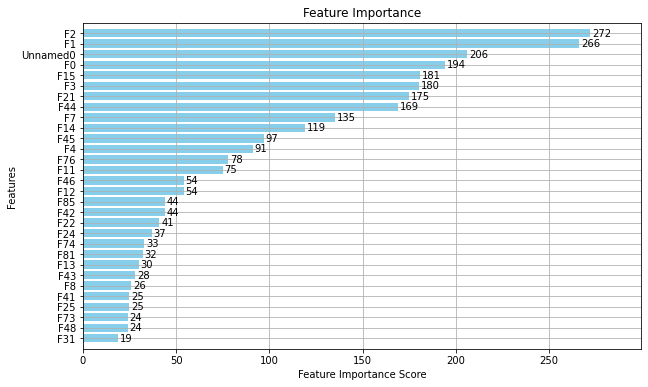

In [46]:
# Plot feature importance


plt.figure(figsize=(10, 6))

lgb.plot_importance(lgbc, ax=plt.gca(), height=0.8, max_num_features=30, color='skyblue')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')

plt.show()



###  Plot the tree


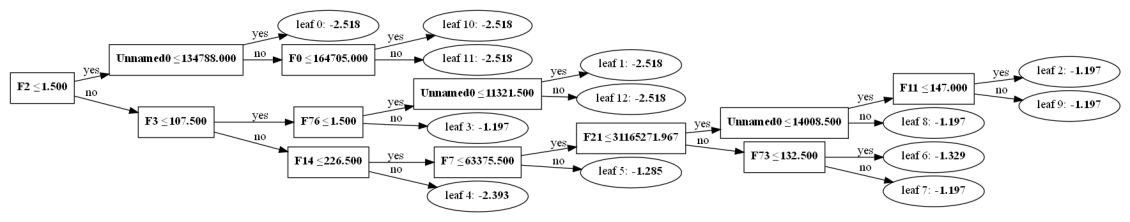

In [47]:
_ = lgb.plot_tree(lgbc, figsize=(20, 20)) # built trees

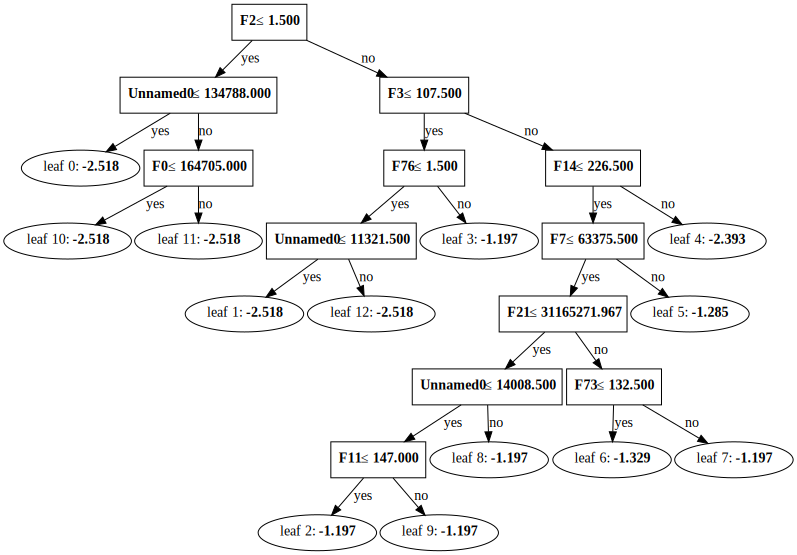

In [48]:
lgb.create_tree_digraph(lgbc, orientation='vertical')

In [49]:
#############################